# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load YS DC

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/ys_total_annotation_20191127.h5ad')

In [4]:
adata.raw = adata

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC progenitor                78
Early mast cell             133
Endothelium                 160
Erythroid AB                892
Erythroid EZ               1167
Erythroid M                 275
ILC precursor                25
Lymphoid progenitor         184
MEMP                        121
Monocyte                     38
Myeloid progenitor           61
NK early                     50
yolk sac Macrophage I      3063
yolk sac Macrophage II     3619
yolk sac progenitor/MPP     205
dtype: int64

In [6]:
adata = adata[adata.obs['cell.labels'].isin(["Monocyte", "DC progenitor"])].copy()

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC progenitor    78
Monocyte         38
dtype: int64

In [8]:
adata.obs["tissue"] = "ys"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [9]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
ys_DC progenitor    78
ys_Monocyte         38
dtype: int64

In [10]:
ys = adata

# Load FL DC

In [11]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad')

In [12]:
adata.raw = adata

In [13]:
adata.obs["tissue"] = "liver"

In [14]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [15]:
adata = adata[adata.obs['cell.labels'].isin(['Monocyte', 'DC precursor', 'DC1', 'DC2', 'pDC precursor'])].copy()

In [16]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC1               336
DC2              3954
DC precursor      330
Monocyte         2586
pDC precursor     253
dtype: int64

In [17]:
adata.obs["tissue"] = "liver"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [18]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
liver_DC precursor      330
liver_DC1               336
liver_DC2              3954
liver_Monocyte         2586
liver_pDC precursor     253
dtype: int64

In [19]:
liver = adata

# Load FBM DC

In [20]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200713.h5ad')

In [21]:
adata.raw = adata

In [22]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell             327
CD8 T cell             171
CD14 monocyte         8787
CD56 bright NK         540
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1493
tDC                    193
tip EC                 363
Length: 64, dtype: int64

In [23]:
adata.obs["tissue"] = "fbm"

In [24]:
adata = adata[adata.obs['cell.labels'].isin(["CD14 monocyte", "DC precursor", "DC1", "DC2", "DC3", "tDC", "pDC"])].copy()

In [25]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte    8787
DC1                50
DC2               598
DC3               705
DC precursor      201
pDC               713
tDC               193
dtype: int64

In [26]:
adata.obs["tissue"] = "fbm"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [27]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
fbm_CD14 monocyte    8787
fbm_DC precursor      201
fbm_DC1                50
fbm_DC2               598
fbm_DC3               705
fbm_pDC               713
fbm_tDC               193
dtype: int64

In [28]:
fbm = adata

# Load ABM DC

In [29]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/adult_bm/data/abm_raw_dr_20200717.h5ad')

In [30]:
adata.raw = adata

In [31]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte             3670
CD16 monocyte             1938
CD56 bright NK            1228
CLP                        882
CMP                        288
DC1                        135
DC2                        481
DC3                        550
DC precursor               462
HSC                        497
LMPP                        80
MEMP                       785
MK                         577
MOP                       1440
MPP                        365
Treg                      6327
early MK                   136
early erythroid           5441
erythroid macrophage        77
immature B cell           2728
late erythroid            1150
mature CD8 T cell        15725
mature NK                 6074
memory B cell             4106
memory CD4 T cell        22197
mid erythroid             2192
monocyte-DC                515
myelocyte                 6675
myeloid DC progenitor      110
naive B cell             19265
naive CD4 T cell          5873
naive CD8 T cell          8

In [32]:
adata.obs["tissue"] = "abm"

In [33]:
adata = adata[adata.obs['cell.labels'].isin(["CD14 monocyte", "CD16 monocyte", "monocyte-DC", "DC precursor", 
                                             "DC1", "DC2", "DC3", "tDC", "pDC"])].copy()

In [34]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte    3670
CD16 monocyte    1938
DC1               135
DC2               481
DC3               550
DC precursor      462
monocyte-DC       515
pDC              1134
tDC                75
dtype: int64

In [35]:
adata.obs["tissue"] = "abm"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [36]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
abm_CD14 monocyte    3670
abm_CD16 monocyte    1938
abm_DC precursor      462
abm_DC1               135
abm_DC2               481
abm_DC3               550
abm_monocyte-DC       515
abm_pDC              1134
abm_tDC                75
dtype: int64

In [37]:
abm = adata

# Merge the DC cell datasets

In [38]:
merged = ys.concatenate(liver, fbm, abm, index_unique=None, join='outer')

In [39]:
merged.shape

(27782, 33713)

In [40]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cell_numbers = merged.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
abm_CD14 monocyte      3670
abm_CD16 monocyte      1938
abm_DC precursor        462
abm_DC1                 135
abm_DC2                 481
abm_DC3                 550
abm_monocyte-DC         515
abm_pDC                1134
abm_tDC                  75
fbm_CD14 monocyte      8787
fbm_DC precursor        201
fbm_DC1                  50
fbm_DC2                 598
fbm_DC3                 705
fbm_pDC                 713
fbm_tDC                 193
liver_DC precursor      330
liver_DC1               336
liver_DC2              3954
liver_Monocyte         2586
liver_pDC precursor     253
ys_DC progenitor         78
ys_Monocyte              38
dtype: int64

In [41]:
merged

AnnData object with n_obs × n_vars = 27782 × 33713 
    obs: 'AnnatomicalPart', 'LouvainClustering', 'age', 'april_cell.labels', 'auto_prd', 'backlabeled_1', 'batch', 'bh_pval', 'cell.labels', 'cell.labels2', 'cell.labels_20200708', 'cell.labels_20200713', 'cell.labels_20200717', 'cell.labels_july', 'cell.labels_progen', 'combined.labels', 'doublets', 'ethnicity', 'fetal.ids', 'full.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'leiden', 'louvain', 'mad_prd', 'nGene', 'nUMI', 'n_counts', 'orig.ident', 'percent.mito', 'predicted.cell.labels', 'processing.type', 'res.30', 'sample', 'sample.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sex', 'sort.ids', 'stages', 'tissue', 'tissue_cell.labels'
    var: 'gene_ids-1-2', 'feature_types-1-2', 'gene_ids-3'

In [42]:
adata = merged

In [43]:
adata.shape

(27782, 33713)

In [44]:
adata.X

<27782x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 57301241 stored elements in Compressed Sparse Row format>

In [45]:
adata.X = np.nan_to_num(adata.X, copy=False)

In [46]:
adata.X

<27782x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 57301241 stored elements in Compressed Sparse Row format>

# Pre-process the merged DC datasets 

In [47]:
# normalise count data 
sc.pp.normalize_total(adata)

In [48]:
# log the count data 
sc.pp.log1p(adata)

In [49]:
adata

AnnData object with n_obs × n_vars = 27782 × 33713 
    obs: 'AnnatomicalPart', 'LouvainClustering', 'age', 'april_cell.labels', 'auto_prd', 'backlabeled_1', 'batch', 'bh_pval', 'cell.labels', 'cell.labels2', 'cell.labels_20200708', 'cell.labels_20200713', 'cell.labels_20200717', 'cell.labels_july', 'cell.labels_progen', 'combined.labels', 'doublets', 'ethnicity', 'fetal.ids', 'full.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'leiden', 'louvain', 'mad_prd', 'nGene', 'nUMI', 'n_counts', 'orig.ident', 'percent.mito', 'predicted.cell.labels', 'processing.type', 'res.30', 'sample', 'sample.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sex', 'sort.ids', 'stages', 'tissue', 'tissue_cell.labels'
    var: 'gene_ids-1-2', 'feature_types-1-2', 'gene_ids-3'

In [50]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [51]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [52]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [53]:
scrna_data = adata

# Run DEGs for the Villani blood DC cells and select top 200 genes

In [54]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/villani/data/villani_blood_raw_20200418.h5ad')

In [55]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC1      166
DC2      105
DC3       95
DC4      182
DC5       30
DC6      173
Mono1    162
Mono2    115
Mono3     31
Mono4     18
nan       63
dtype: int64

In [56]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [57]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [58]:
# run degs on normalised and logged data (saved as adata.raw), not on additionally scaled data (saved as adata.X).
# calculate degs using wilcoxon rank sum test with benjamini-hochberg correction. 
#based on ln transformed count data 
sc.tl.rank_genes_groups(adata, groupby='cell.labels', method='wilcoxon', use_raw=False, log_transformed=True, n_genes=1000)

In [59]:
# filter the degs for those which are expressed in at least 25% of cells in cluster. log2fc of the ln-transformed
# data will be shown.
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.25, min_fold_change=0.25, use_raw=False)

In [60]:
# save df for unfiltered degs
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs_by_cluster = pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})

# the degs_by_cluster df shows the log2 fold change for each gene ordered by z-score underlying the computation 
# of a p-value for each gene for each group
degs_by_cluster.to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/figs/clustering_degs/villani_blood_degs_20200719.csv")
degs_by_cluster[:10]

,DC1_n,DC1_l,DC2_n,DC2_l,DC3_n,DC3_l,DC4_n,DC4_l,DC5_n,DC5_l,DC6_n,DC6_l,Mono1_n,Mono1_l,Mono2_n,Mono2_l,Mono3_n,Mono3_l,Mono4_n,Mono4_l,nan_n,nan_l
0,C1ORF54,9.285081,CD1C,6.815081,ANXA2,2.410835,FCGR3A,5.912551,AXL,7.875665,GZMB,11.413696,CD14,4.628565,PSAP,3.483294,NAMPT,4.707185,PRF1,15.952913,MALAT1,2.872266
1,HLA-DPA1,4.190456,FCER1A,3.326932,FCER1A,2.622147,LST1,4.680063,PPP1R14A,9.786463,IGJ,11.003342,VCAN,4.927220,LAIR2,3.592697,NEAT1,4.434678,KLRD1,10.890848,AK123889,3.293021
2,HLA-DPB2,4.806285,HLA-DRA,2.930232,RNASE2,4.838983,AIF1,3.882041,SIGLEC6,9.126151,AK128525,8.586622,FCN1,3.483912,IFI30,2.974496,G0S2,4.904361,CTSW,10.486708,TMEM45A,3.026268
3,CD74,4.204714,HLA-DQA1,3.230815,GAPDH,2.325563,AK307192,4.998025,CD22,8.323937,PLD4,8.008921,ITGB2,3.579617,FTL,2.699904,SRGN,4.529840,GNLY,16.288263,PCSK5,1.786603
4,HLA-DPB1,4.647665,HLA-DQA2,3.230637,ANXA1,2.261307,IFITM3,4.842368,S100A10,3.702982,SERPINF1,8.753836,TKT,3.920341,SAT1,2.136582,TREM1,4.372675,KLRC4-KLRK1,13.359554,BC016143,2.754815
5,HLA-DQB,4.283920,CLEC10A,4.668222,SH3BGRL3,2.183221,SERPINA1,3.579072,DAB2,5.516155,CCDC50,8.147037,S100A9,3.481919,ASAH1,2.864983,FCGR3B,6.175405,TCRBV3S1,11.133481,C7ORF46,3.071007
6,HLA-DQB1,4.266339,HLA-DRB4,2.665184,CLEC10A,3.061477,FTL,3.298368,LGMN,3.718651,PLAC8,6.194878,LYZ,3.361121,PTPRC,2.069208,AL137655,3.395026,NKG7,11.690014,MIPOL1,3.885926
7,WDFY4,5.388454,DQ-A1,3.149389,LYZ,1.977648,FCER1G,3.016052,FAM105A,4.859897,ITM2C,7.898571,LRP1,3.894653,LCP1,2.424942,MXD1,4.757539,FGFBP2,13.570162,TBC1D8B,3.959670
8,CPVL,5.874774,HLA-DQB,2.765099,CAPG,2.406375,SAT1,3.211822,ACTG1,2.570717,TCF4,7.654769,S100A8,3.260602,LIPA,3.136947,CSF3R,4.319530,IL2RB,9.847591,ATP9B,3.668524
9,CPNE3,5.098878,HLA-DPB2,1.802943,RETN,3.462171,MS4A7,4.197921,MYL12A,3.025292,IRF7,8.772699,APLP2,3.337466,SERPINA1,1.811052,MNDA,4.294890,TXK,11.770041,PEAK1,3.878707


In [61]:
# save df for filtered degs
result = adata.uns['rank_genes_groups_filtered']
groups = result['names'].dtype.names
degs_by_cluster_filtered = pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})
# the degs_by_cluster df shows the log2 fold change for each gene ordered by z-score underlying the computation 
# of a p-value for each gene for each group
degs_by_cluster_filtered.to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/figs/clustering_degs/villani_blood_filtered_20200719.csv")
degs_by_cluster_filtered[:10]

,DC1_n,DC1_l,DC2_n,DC2_l,DC3_n,DC3_l,DC4_n,DC4_l,DC5_n,DC5_l,DC6_n,DC6_l,Mono1_n,Mono1_l,Mono2_n,Mono2_l,Mono3_n,Mono3_l,Mono4_n,Mono4_l,nan_n,nan_l
0,C1ORF54,9.285081,CD1C,6.815081,ANXA2,2.410835,FCGR3A,5.912551,AXL,7.875665,GZMB,11.413696,CD14,4.628565,PSAP,3.483294,NAMPT,4.707185,PRF1,15.952913,MALAT1,2.872266
1,HLA-DPA1,4.190456,FCER1A,3.326932,FCER1A,2.622147,LST1,4.680063,PPP1R14A,9.786463,IGJ,11.003342,VCAN,4.927220,LAIR2,3.592697,NEAT1,4.434678,KLRD1,10.890848,AK123889,3.293021
2,HLA-DPB2,4.806285,HLA-DRA,2.930232,RNASE2,4.838983,AIF1,3.882041,SIGLEC6,9.126151,AK128525,8.586622,FCN1,3.483912,IFI30,2.974496,G0S2,4.904361,CTSW,10.486708,TMEM45A,3.026268
3,CD74,4.204714,HLA-DQA1,3.230815,GAPDH,2.325563,AK307192,4.998025,CD22,8.323937,PLD4,8.008921,ITGB2,3.579617,FTL,2.699904,SRGN,4.529840,GNLY,16.288263,PCSK5,1.786603
4,HLA-DPB1,4.647665,HLA-DQA2,3.230637,ANXA1,2.261307,IFITM3,4.842368,S100A10,3.702982,SERPINF1,8.753836,TKT,3.920341,SAT1,2.136582,TREM1,4.372675,KLRC4-KLRK1,13.359554,BC016143,2.754815
5,HLA-DQB,4.283920,CLEC10A,4.668222,SH3BGRL3,2.183221,SERPINA1,3.579072,DAB2,5.516155,CCDC50,8.147037,S100A9,3.481919,ASAH1,2.864983,FCGR3B,6.175405,TCRBV3S1,11.133481,C7ORF46,3.071007
6,HLA-DQB1,4.266339,HLA-DRB4,2.665184,CLEC10A,3.061477,FTL,3.298368,LGMN,3.718651,PLAC8,6.194878,LYZ,3.361121,PTPRC,2.069208,AL137655,3.395026,NKG7,11.690014,MIPOL1,3.885926
7,WDFY4,5.388454,DQ-A1,3.149389,LYZ,1.977648,FCER1G,3.016052,FAM105A,4.859897,ITM2C,7.898571,LRP1,3.894653,LCP1,2.424942,MXD1,4.757539,FGFBP2,13.570162,TBC1D8B,3.959670
8,CPVL,5.874774,HLA-DQB,2.765099,CAPG,2.406375,SAT1,3.211822,ACTG1,2.570717,TCF4,7.654769,S100A8,3.260602,LIPA,3.136947,CSF3R,4.319530,IL2RB,9.847591,ATP9B,3.668524
9,CPNE3,5.098878,HLA-DPB2,1.802943,RETN,3.462171,MS4A7,4.197921,MYL12A,3.025292,IRF7,8.772699,APLP2,3.337466,SERPINA1,1.811052,MNDA,4.294890,TXK,11.770041,PEAK1,3.878707


In [62]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC1      166
DC2      105
DC3       95
DC4      182
DC5       30
DC6      173
Mono1    162
Mono2    115
Mono3     31
Mono4     18
nan       63
dtype: int64

# Save top 100 filtered DEGs within dictionary

In [63]:
# sort the degs_by_cluster_filtered df genes by logfc
df = degs_by_cluster_filtered
df[:5]

,DC1_n,DC1_l,DC2_n,DC2_l,DC3_n,DC3_l,DC4_n,DC4_l,DC5_n,DC5_l,DC6_n,DC6_l,Mono1_n,Mono1_l,Mono2_n,Mono2_l,Mono3_n,Mono3_l,Mono4_n,Mono4_l,nan_n,nan_l
0,C1ORF54,9.285081,CD1C,6.815081,ANXA2,2.410835,FCGR3A,5.912551,AXL,7.875665,GZMB,11.413696,CD14,4.628565,PSAP,3.483294,NAMPT,4.707185,PRF1,15.952913,MALAT1,2.872266
1,HLA-DPA1,4.190456,FCER1A,3.326932,FCER1A,2.622147,LST1,4.680063,PPP1R14A,9.786463,IGJ,11.003342,VCAN,4.927220,LAIR2,3.592697,NEAT1,4.434678,KLRD1,10.890848,AK123889,3.293021
2,HLA-DPB2,4.806285,HLA-DRA,2.930232,RNASE2,4.838983,AIF1,3.882041,SIGLEC6,9.126151,AK128525,8.586622,FCN1,3.483912,IFI30,2.974496,G0S2,4.904361,CTSW,10.486708,TMEM45A,3.026268
3,CD74,4.204714,HLA-DQA1,3.230815,GAPDH,2.325563,AK307192,4.998025,CD22,8.323937,PLD4,8.008921,ITGB2,3.579617,FTL,2.699904,SRGN,4.529840,GNLY,16.288263,PCSK5,1.786603
4,HLA-DPB1,4.647665,HLA-DQA2,3.230637,ANXA1,2.261307,IFITM3,4.842368,S100A10,3.702982,SERPINF1,8.753836,TKT,3.920341,SAT1,2.136582,TREM1,4.372675,KLRC4-KLRK1,13.359554,BC016143,2.754815


In [64]:
my_dict = {}

for i in adata.obs["cell.labels"].unique().tolist():
    # for each DEG list
    print(i)
    # assign cols
    gene_name = str(i) + "_n"
    logfc = str(i) + "_l"
    
    # sort values of genes based on logfc
    df = df.sort_values([logfc], ascending=False)
    gene_list = df[gene_name].tolist()
    # remove nan values from genes
    cleanedList = [x for x in gene_list if str(x) != 'nan']
    #get top 100 genes
    top_100_genes = cleanedList[:100] 
    # save 100 degs as values in key named "celltype"_degs
    x = str(i) + "_degs"
    my_dict[x] = top_100_genes

del my_dict['nan_degs']

DC1
DC5
DC2
DC3
nan
DC6
DC4
Mono1
Mono2
Mono3
Mono4


# Run cell cycle score comparisons

In [65]:
adata = scrna_data

In [66]:
# run through DEG list for each cell type, run score_genes function on adata object for these genes and save in .obs
celltypes_string_list = list(my_dict.keys())

DEG_lists=list(my_dict.values())
counter=0

for i in DEG_lists:
    sc.tl.score_genes(adata, gene_list=i, score_name=celltypes_string_list[counter])
    counter=counter+1

In [67]:
# order tissue_cell.labels column

adata.obs["tissue_cell.labels"].unique()

array(['ys_Monocyte', 'ys_DC progenitor', 'liver_DC2', 'liver_Monocyte',
       'liver_DC1', 'liver_pDC precursor', 'liver_DC precursor',
       'fbm_CD14 monocyte', 'fbm_DC precursor', 'fbm_DC3', 'fbm_pDC',
       'fbm_DC2', 'fbm_tDC', 'fbm_DC1', 'abm_DC2', 'abm_DC precursor',
       'abm_CD16 monocyte', 'abm_CD14 monocyte', 'abm_monocyte-DC',
       'abm_pDC', 'abm_DC3', 'abm_tDC', 'abm_DC1'], dtype=object)

In [68]:
# order tissue_cell.labels column

adata.obs["tissue_cell.labels"] = adata.obs["tissue_cell.labels"].astype("category")

adata.obs["tissue_cell.labels"] = adata.obs["tissue_cell.labels"].cat.reorder_categories([
       'ys_Monocyte', 'ys_DC progenitor', 
       'liver_Monocyte', 'liver_DC precursor', 'liver_DC1', 'liver_DC2', 'liver_pDC precursor',
       'fbm_CD14 monocyte', 'fbm_DC precursor', 'fbm_DC1', 'fbm_DC2', 'fbm_DC3', 'fbm_pDC', 'fbm_tDC',
       'abm_CD14 monocyte', 'abm_CD16 monocyte', 'abm_monocyte-DC',
       'abm_DC precursor', 'abm_DC1', 'abm_DC2', 'abm_DC3', 'abm_pDC', 'abm_tDC'])

In [69]:
adata.obs["tissue_cell.labels"].unique()

[ys_Monocyte, ys_DC progenitor, liver_DC2, liver_Monocyte, liver_DC1, ..., abm_monocyte-DC, abm_pDC, abm_DC3, abm_tDC, abm_DC1]
Length: 23
Categories (23, object): [ys_Monocyte, ys_DC progenitor, liver_DC2, liver_Monocyte, ..., abm_pDC, abm_DC3, abm_tDC, abm_DC1]

In [70]:
# save cell cycle scores within metadata as a dataframe (called enrichement scores)
adata.obs["labels"] = adata.obs["tissue_cell.labels"]
meta = pd.DataFrame(adata.obs)
enrichment_scores_df = meta[meta.columns[-11:]]
enrichment_scores_df

,DC1_degs,DC5_degs,DC2_degs,DC3_degs,DC6_degs,DC4_degs,Mono1_degs,Mono2_degs,Mono3_degs,Mono4_degs,labels
index,,,,,,,,,,,
F32_yolk sac_Total_FCAImmP7316900_CTGGTCTAGCGAAGGG,-0.061293,-0.097311,0.162213,0.177619,-0.145680,0.243136,0.187008,0.441296,0.155405,-0.039063,ys_Monocyte
F32_yolk sac_Total_FCAImmP7316900_GCATGTAGTTTGGCGC,-0.015515,-0.038863,-0.115388,0.095710,-0.055081,0.166180,0.154391,0.222711,0.067145,-0.084224,ys_Monocyte
F32_yolk sac_Total_FCAImmP7316900_CCAATCCCATTGGGCC,0.023112,0.143649,-0.122324,-0.182214,0.203359,-0.192441,-0.160646,-0.091112,-0.092714,1.798480,ys_DC progenitor
F35_yolk sac_Total_FCAImmP7462244_ACTGAACAGCGATCCC,0.048103,-0.042730,0.035172,0.183097,-0.104398,0.209667,0.228637,0.029576,0.279220,0.016461,ys_Monocyte
F35_yolk sac_Total_FCAImmP7462244_CACAAACAGATATGCA,0.019883,0.008013,-0.132523,0.175872,-0.018132,0.203431,0.469601,0.219658,0.504541,0.061632,ys_Monocyte
...,...,...,...,...,...,...,...,...,...,...,...
MantonBM6_HiSeq_8-TTTCCTCTCGTTTGCC-1,-0.036194,0.001754,0.030535,-0.007880,-0.222081,-0.117562,-0.096942,-0.110485,-0.136435,0.035083,abm_DC3
MantonBM6_HiSeq_8-TTTGGTTAGGCCATAG-1,0.289106,0.134837,0.583011,0.323335,-0.152704,-0.017077,-0.144138,0.015962,-0.025052,0.007047,abm_DC2
MantonBM6_HiSeq_8-TTTGGTTCAGACGCTC-1,0.017817,-0.095867,-0.016593,-0.139948,-0.065908,0.780023,0.098288,0.230206,-0.001186,-0.008815,abm_CD16 monocyte


In [71]:
# calculate mean enrichment scores by celltype
mean_enrichment_scores_df = enrichment_scores_df.groupby('labels').mean()
mean_enrichment_scores_df = mean_enrichment_scores_df.T
mean_enrichment_scores_df = mean_enrichment_scores_df.sort_index()
mean_enrichment_scores_df

labels,ys_Monocyte,ys_DC progenitor,liver_Monocyte,liver_DC precursor,liver_DC1,liver_DC2,liver_pDC precursor,fbm_CD14 monocyte,fbm_DC precursor,fbm_DC1,fbm_DC2,fbm_DC3,fbm_pDC,fbm_tDC,abm_CD14 monocyte,abm_CD16 monocyte,abm_monocyte-DC,abm_DC precursor,abm_DC1,abm_DC2,abm_DC3,abm_pDC,abm_tDC
DC1_degs,-0.039692,-0.029561,-0.034409,0.167625,1.471043,0.162330,-0.044429,-0.080684,0.014446,1.579502,0.120851,-0.038182,-0.036295,0.120648,-0.032127,-0.038040,-0.010348,0.111067,1.367427,0.236859,0.046266,-0.005208,0.175121
DC2_degs,-0.093681,-0.165881,0.026502,0.137449,0.229458,0.270642,-0.128589,-0.016980,-0.123217,0.138673,0.154613,-0.004082,-0.183042,0.032861,0.029959,-0.049916,0.073236,0.242734,0.264481,0.569410,0.193979,-0.028527,0.150267
DC3_degs,0.088023,-0.080688,0.149576,0.068162,-0.046959,0.111127,-0.179860,0.126145,-0.090444,-0.116519,0.074459,0.088065,-0.244743,-0.074149,0.149895,-0.012055,0.144158,0.224940,0.000101,0.316966,0.227125,-0.109432,0.047184
DC4_degs,0.018327,-0.142686,0.142589,-0.085762,-0.060538,0.079573,-0.135482,0.082156,-0.202936,-0.185764,-0.149588,-0.117311,-0.193304,-0.164940,0.111936,0.653267,0.144219,-0.119113,-0.101535,-0.020118,0.051147,-0.102767,-0.064740
DC5_degs,0.084768,0.040194,0.022884,0.176585,0.125802,0.120973,0.276761,-0.002499,0.133486,0.110917,0.201744,0.057929,0.365590,0.621339,-0.008649,-0.029849,-0.007091,0.176300,0.122708,0.161743,0.039534,0.257383,0.591485
DC6_degs,-0.136275,-0.095311,-0.119470,-0.083211,-0.066607,-0.089232,0.969539,-0.151511,-0.038328,-0.153654,-0.133683,-0.162308,1.306538,0.191234,-0.115143,-0.126759,-0.125613,-0.099834,-0.114193,-0.105823,-0.122136,1.080881,0.209485
Mono1_degs,0.173642,-0.233950,0.265478,-0.222180,-0.199459,-0.098799,-0.275266,0.325328,-0.276687,-0.298224,-0.250869,-0.147583,-0.352501,-0.294280,0.259567,-0.009070,0.182900,-0.161550,-0.191789,-0.100552,0.036786,-0.205117,-0.179074
Mono2_degs,0.141142,-0.117431,0.210073,-0.056649,-0.002430,0.089002,-0.126943,0.149058,-0.172671,-0.106103,-0.092222,-0.067320,-0.166061,-0.130897,0.178788,0.355721,0.200023,-0.079014,-0.069468,0.001305,0.085577,-0.095509,-0.061825
Mono3_degs,0.175346,-0.149412,0.234182,-0.095980,-0.105578,-0.028691,-0.138488,0.257526,-0.166438,-0.167642,-0.135784,-0.084003,-0.169902,-0.170403,0.149384,0.052372,0.103697,-0.080121,-0.112120,-0.027113,0.018936,-0.093723,-0.089038
Mono4_degs,-0.015434,0.138950,0.039461,0.004061,-0.006436,0.016171,-0.031413,-0.043504,-0.088418,-0.112744,-0.082462,-0.081560,-0.085454,-0.098639,-0.039418,-0.040062,-0.036124,-0.020640,-0.045809,-0.002543,-0.023741,-0.019353,-0.006667


# Run heatmap

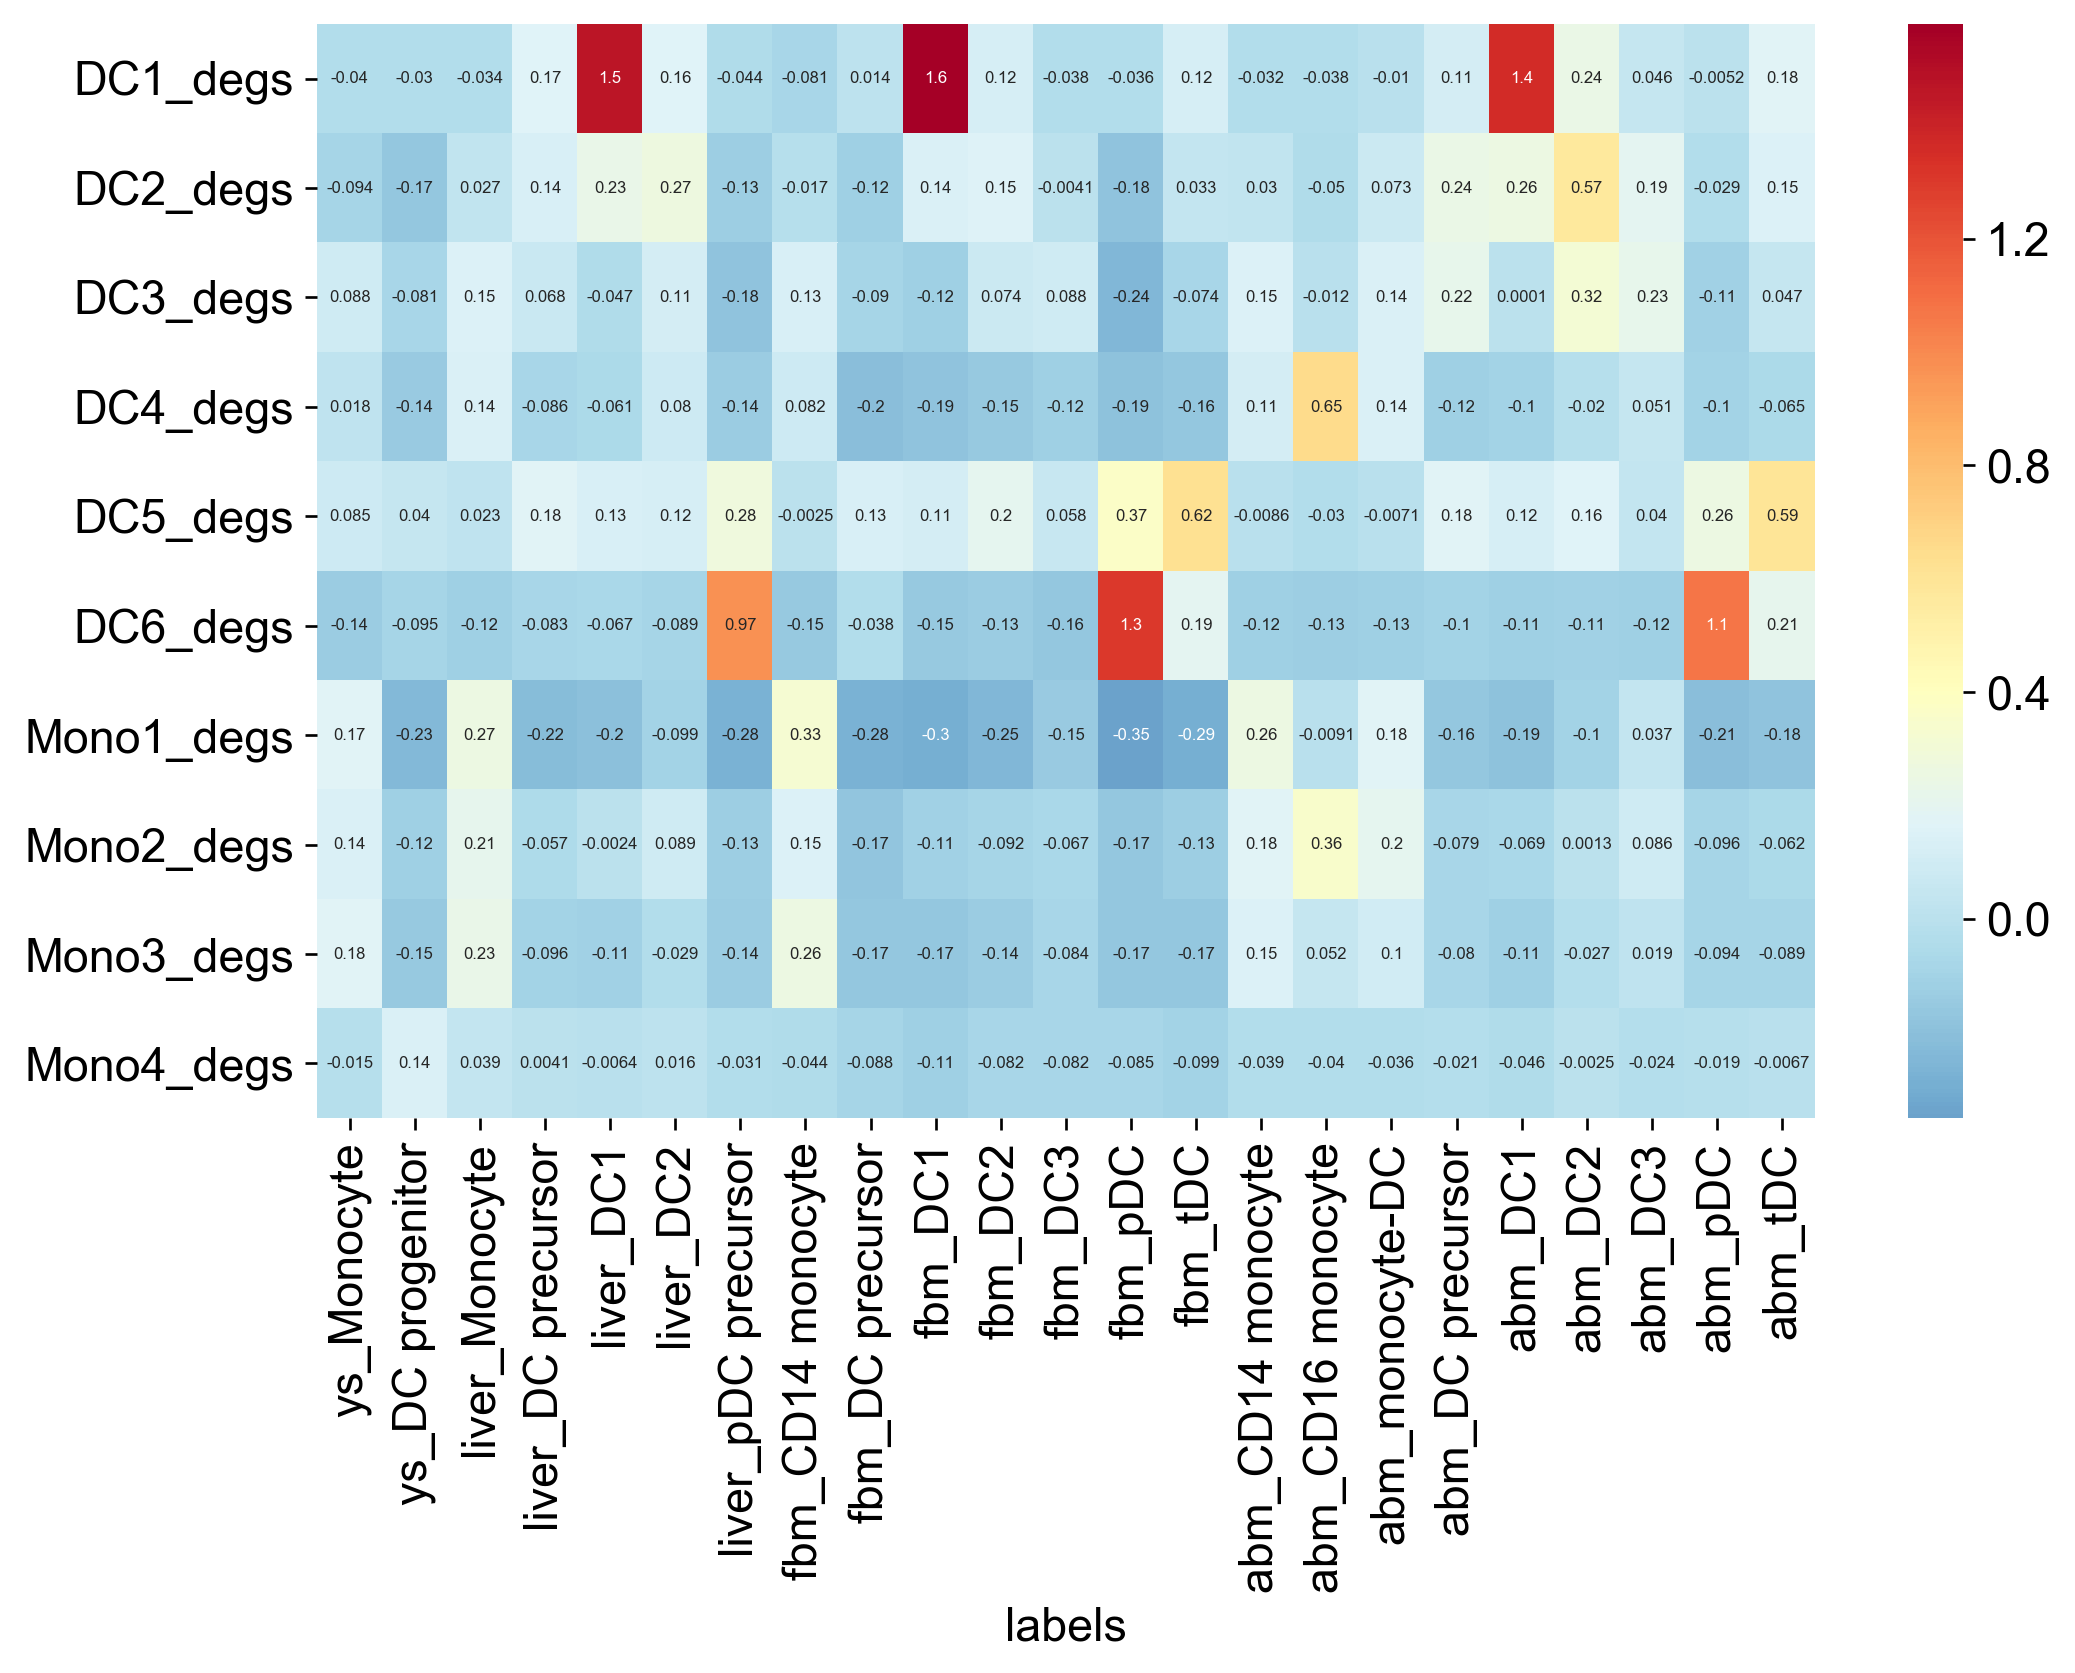

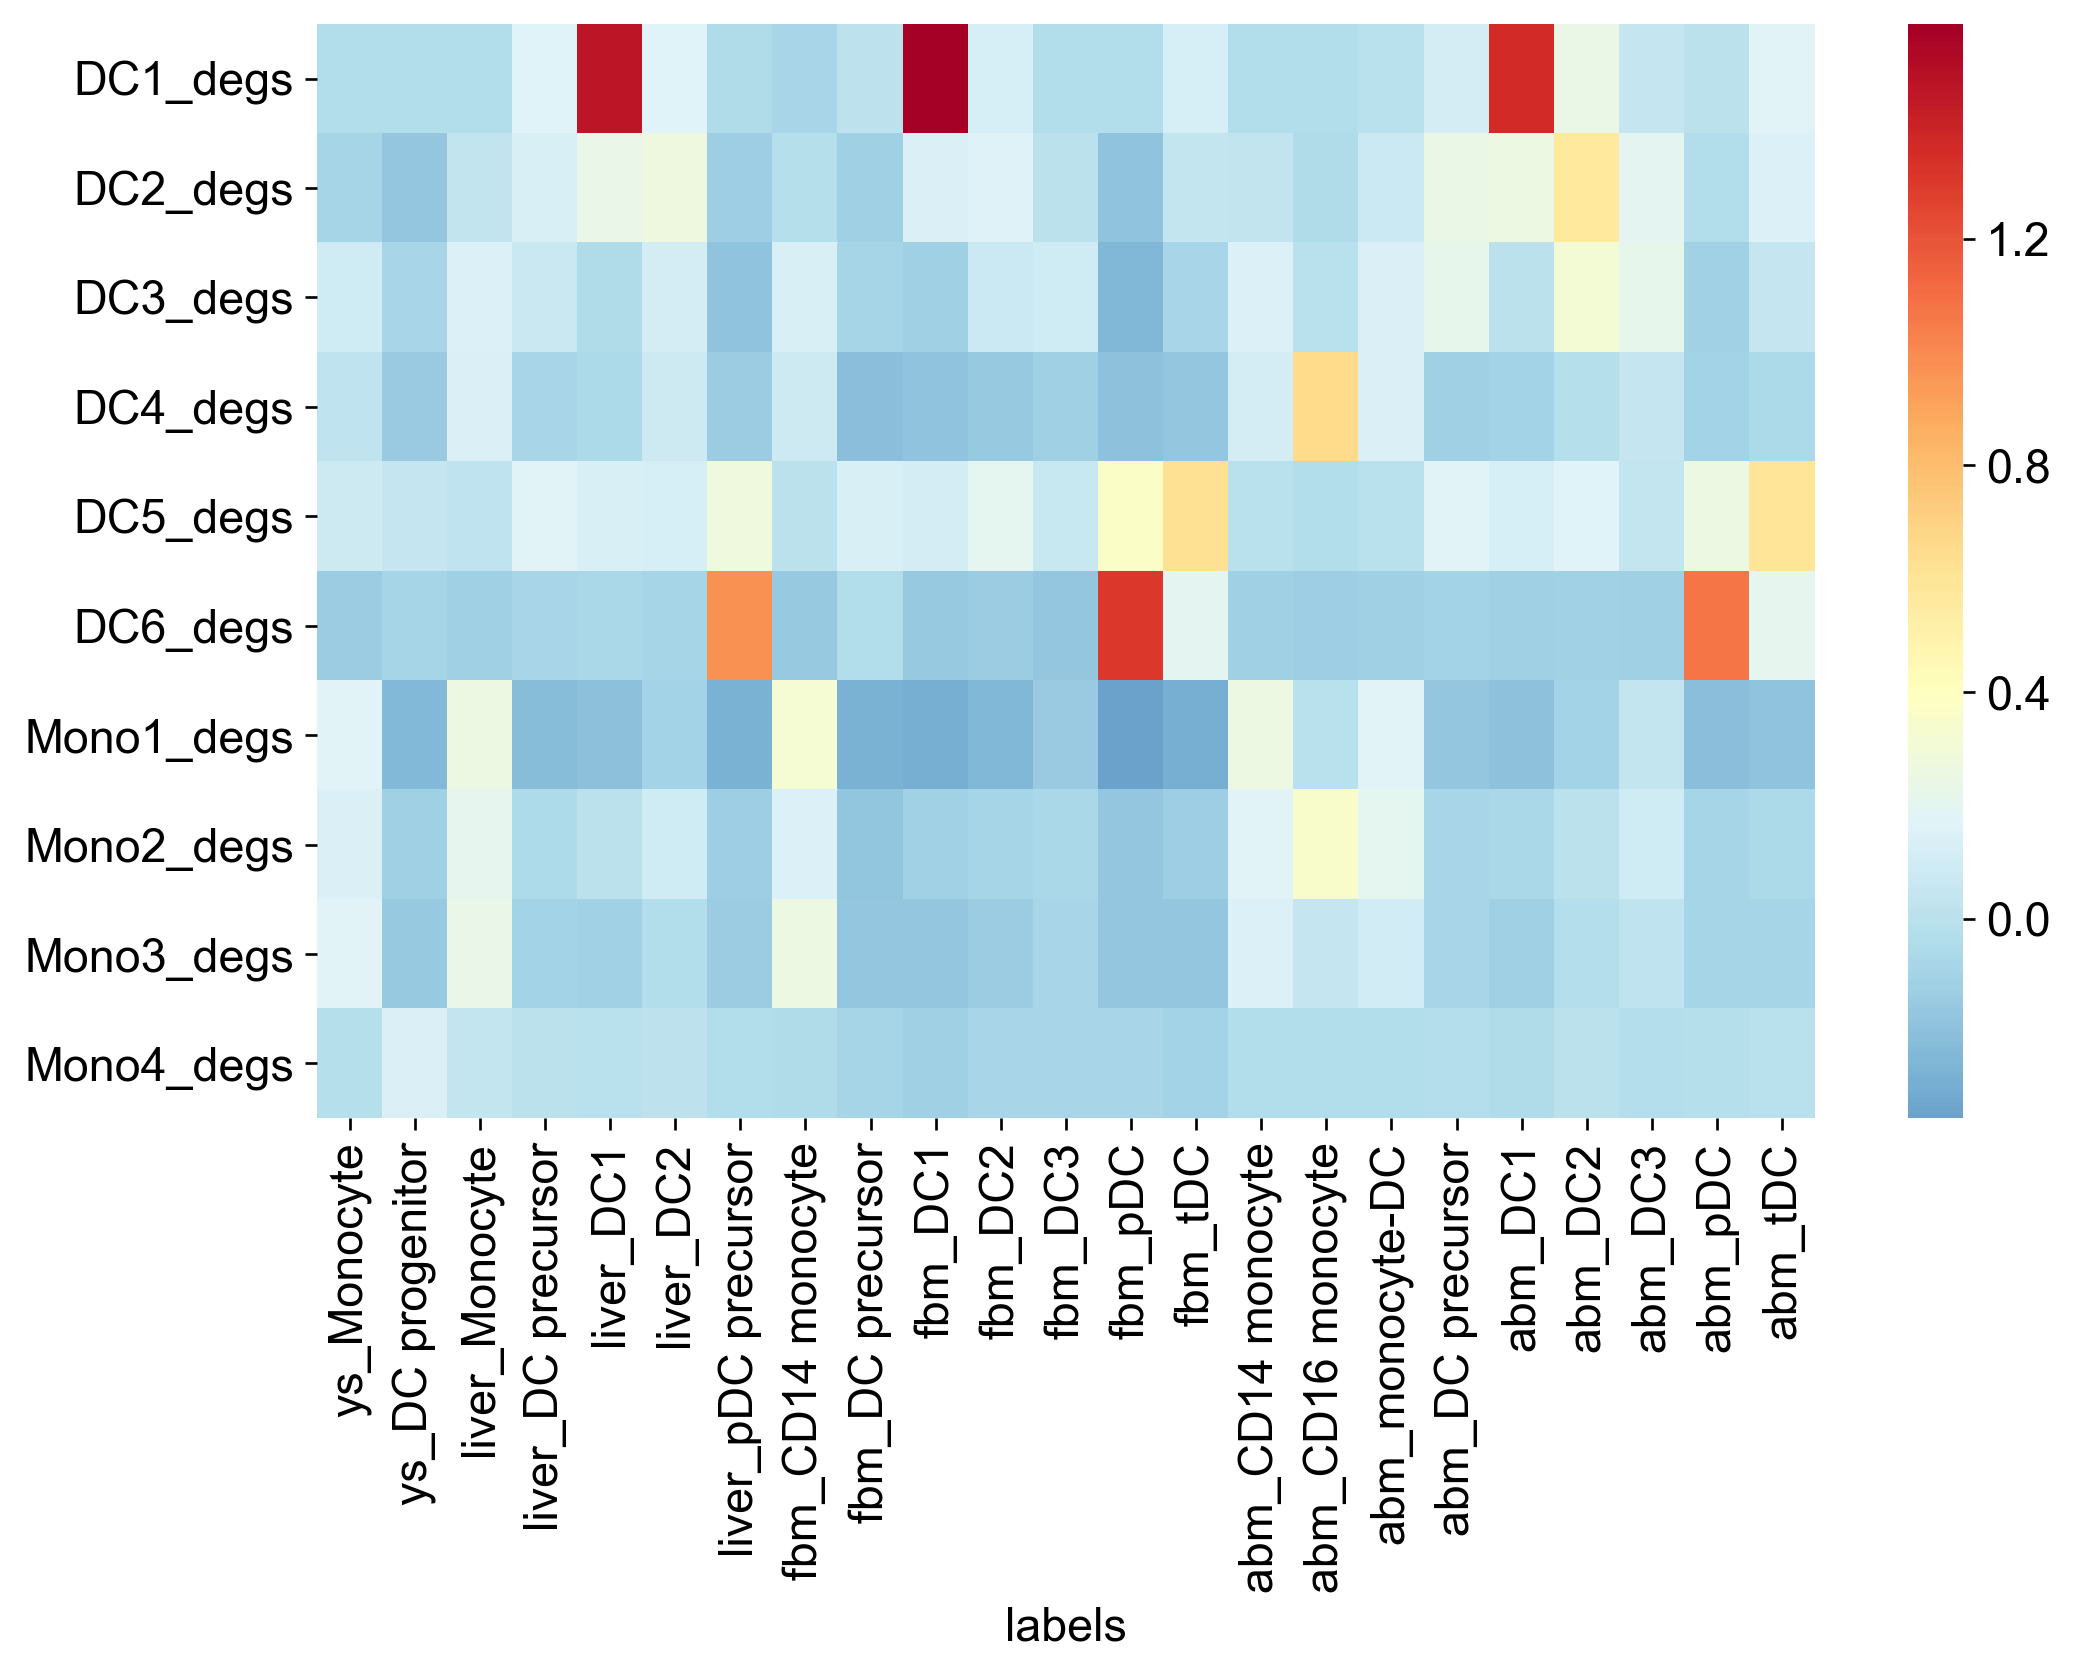

In [72]:
plt.figure(figsize=(10, 6))
fig = sns.heatmap(mean_enrichment_scores_df, annot=True, fmt=".2", center=0.4, annot_kws={"size": 5}, cmap="RdYlBu_r").get_figure() #xticklabels=cell_label_order, yticklabels=cell_label_order,
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
fig.savefig("figures/figs2e_dc_blood_comparison_numbers_yes_20200719.pdf")

plt.figure(figsize=(10, 6))
fig = sns.heatmap(mean_enrichment_scores_df, cmap="RdYlBu_r", center=0.4).get_figure() 
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
fig.savefig("figures/figs2e_dc_blood_comparison_numbers_no_20200719.pdf")

# Save data

In [73]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [74]:
adata.X

<27782x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 51728152 stored elements in Compressed Sparse Row format>

In [75]:
adata.raw.X

<27782x33713 sparse matrix of type '<class 'numpy.float32'>'
	with 57301241 stored elements in Compressed Sparse Row format>

In [76]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs2e_dc_20200719.h5ad")

... storing 'AnnatomicalPart' as categorical
... storing 'age' as categorical
... storing 'april_cell.labels' as categorical
... storing 'auto_prd' as categorical
... storing 'backlabeled_1' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels2' as categorical
... storing 'cell.labels_20200708' as categorical
... storing 'cell.labels_20200713' as categorical
... storing 'cell.labels_20200717' as categorical
... storing 'cell.labels_july' as categorical
... storing 'cell.labels_progen' as categorical
... storing 'combined.labels' as categorical
... storing 'doublets' as categorical
... storing 'ethnicity' as categorical
... storing 'fetal.ids' as categorical
... storing 'full.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'leiden' as categorical
... storing 'mad_prd' as c